In [269]:
import numpy as np
from numpy import random
import pandas as pd
import operator
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [270]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [296]:
data = pd.read_csv("/content/drive/My Drive/AI/dataset_Facebook.csv", sep=';')  #
data_frame = pd.DataFrame(data)       #reading data and creating a dataframe
data_frame = data_frame.sample(frac=1)  #shuffling the dataframe
print(data_frame)

#after shuffling dividing the dataset into training dataset and test dataset
Training_data = pd.DataFrame(data_frame.iloc[:250,:])     #giving 250 rows to training set 
Training_data.drop(data_frame.columns[[1,2,6,16,17]], axis = 1, inplace = True)     #dropping class and float type columns
Training_data.reset_index(drop=True, inplace=False)     
Training_data.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13'] #renaming the columns
print(Training_data)

Test_data = pd.DataFrame(data_frame.iloc[250:,:])   #giving 250 rows to test set
Test_data.drop(data_frame.columns[[1,2,6,16,17]], axis = 1, inplace = True)   #dropping class and float type columns
Test_data.reset_index(drop=True, inplace=False)
Test_data.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13'] #renaming the columns
print(Test_data)

     Page total likes    Type  Category  ...   like  share  Total Interactions
155            135700   Photo         2  ...   54.0   16.0                  70
343            117764   Photo         3  ...  101.0   29.0                 136
207            132201   Photo         2  ...  137.0   20.0                 162
479             86909   Photo         3  ...   84.0   36.0                 127
293            125612   Photo         2  ...   71.0   23.0                  95
..                ...     ...       ...  ...    ...    ...                 ...
371            113028  Status         2  ...  447.0  123.0                 587
288            126141   Photo         1  ...  469.0   33.0                 605
430            100732    Link         1  ...    6.0    0.0                   6
278            126345   Photo         1  ...  202.0    5.0                 218
67             138185   Photo         1  ...  697.0   70.0                 787

[500 rows x 19 columns]
          0   1  2   3     

**KNN Algo**

In [272]:
# Defining a function which calculates euclidean distance between two data points
def EuclideanDistance(testdata, training_data, lenofTest):
  distance = 0
  for x in range(lenofTest):
    distance += np.square(testdata[x] - training_data[x])
  return np.sqrt(distance)


In [273]:
def knn(dataSet, testDataSet, k):
 
  EU_distance = {}    #to store euclidean distance
  neighbors = []      #to store nearest neighbors
  most_freq_class = {}    #to store most freq classes
  lengthOfTest = testDataSet.shape[1]   #length of test data set

  #Calculating euclidean distance between each row of training data set and test data set
  x = 0
  while (x < len(dataSet)):  
    eu_dist = EuclideanDistance(testDataSet.iloc[x], dataSet.iloc[x], lengthOfTest)
    EU_distance[x] = eu_dist
    x += 1

  #Sorting them on the basis of distance
  Sort_EU_dist = sorted(EU_distance.items(), key=operator.itemgetter(1))
  
  #gtting k neighbors on the top
  x = 0
  for x in range(k):
    neighbors.append(Sort_EU_dist[x][0]) #getting row index of the most frequent class
  
  #Calculating the most freq class in the neighbors
  i = 0
  while i < len(neighbors):
    row_index = data_frame.iloc[neighbors[i]]['Category']   #as the Category column repersents my class i get the class of the neighbors
    if row_index in most_freq_class:
        most_freq_class[row_index] += 1   #if class already exists then add 1 to freq
    else:
        most_freq_class[row_index] = 1    #if it does not exist than initialise it at one
    i += 1

  sorted_Class_freq = sorted(most_freq_class.items(), key=operator.itemgetter(1), reverse=True) #highest freq at the top
  return(sorted_Class_freq[0][0], neighbors)  #return the predicted class and the neihbors array


In [297]:
print('\nWith 5 Nearest Neighbour')
#***********with 5 nearesrt neighbours***************************
k = 5
pred_class,neighbours = knn(Training_data, Test_data, k)  #running KNN algo
print('\nPredicted Class of the datapoint = ', pred_class)    #getting predicted class
print('\nNearest Neighbour of the datapoints = ',neighbours)    #getting k nearest neighbors

print('\n\nWith 7 Nearest Neighbours')
#***********with 7 nearesrt neighbours***************************
k = 7
pred_class,neighbours = knn(Training_data, Test_data, k)  #running KNN algo
print('\nPredicted Class of the datapoint = ', pred_class)    #getting predicted class
print('\nNearest Neighbour of the datapoints = ',neighbours)    #getting k nearest neighbors


print('\n\nWith 9 Nearest Neighbours') 
#***********with 9 nearesrt neighbours***************************
k = 9
pred_class,neighbours = knn(Training_data, Test_data, k)  #running KNN algo
print('\nPredicted Class of the datapoint = ', pred_class)    #getting predicted class
print('\nNearest Neighbour of the datapoints = ',neighbours)    #getting k nearest neighbors
accurate = accuracy()
print("\n\nAccuracy = ", accurate)


With 5 Nearest Neighbour

Predicted Class of the datapoint =  1

Nearest Neighbour of the datapoints =  [76, 55, 185, 137, 85]


With 7 Nearest Neighbours

Predicted Class of the datapoint =  1

Nearest Neighbour of the datapoints =  [76, 55, 185, 137, 85, 20, 3]


With 9 Nearest Neighbours

Predicted Class of the datapoint =  1

Nearest Neighbour of the datapoints =  [76, 55, 185, 137, 85, 20, 3, 97, 150]


Accuracy =  0.5555555555555556


Function to calculate Accuracy

In [275]:
def accuracy():
  acc_count = 0
  for i in range(len(neighbours)):
    if pred_class == data_frame.iloc[neighbours[i]]['Category']:
      acc_count += 1
  return acc_count/len(neighbours)

**K-means Algo**

In [276]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example ''' 
    m = X.shape[0] # no of datappints
    k = centroids.shape[0]  #division size
    idx = np.zeros(m) # array to assign the centriod
    cluster_num = np.zeros(m)
    # Your Code Here
    for j in range(m):
      dataFrame_row = np.array([X.iloc[j]])
      distance_from_1 = np.linalg.norm(dataFrame_row-centroids[0]) #will get the distances between all the point and each cluster1
      distance_from_2 = np.linalg.norm(dataFrame_row-centroids[1])  #will get the distances between all the point and each cluster2
      distance_from_3 = np.linalg.norm(dataFrame_row-centroids[2])   #will get the distances between all the point and each cluster3
      #print(distance_from_1)
      min_distance = min(distance_from_1,distance_from_2,distance_from_3)   #we get the minimum distance that point has with any of the clusters
      # keeping a numbering array for clusters so later on it is easrier to extract which datapoint belongs to which cluster 
      if min_distance == distance_from_1:   
        cluster_num[j] = 0 
      elif min_distance == distance_from_2:
        cluster_num[j] = 1 
      elif min_distance == distance_from_3:
        cluster_num[j] = 2   
      idx[j] = min_distance   #storing the minimum distance and assign to the centroid

    return idx, cluster_num



In [277]:
# Update Centroids
def compute_centroids(X, idx, k, cluster_num):
    m, n = X.shape
    centroids = np.zeros((k, n))  #3*4
    '''Return Updated Values of all K centroids''' 
    i = 0
    for i in range(k):
      indices = np.where(cluster_num == i) #where indices are 0, 1 and 2 in the idx array
      centroids[i,:] = (np.sum(X.values[indices,:], axis=1) / len(indices[0])).ravel()     #calculating new centroids by dividing the sum of all value by the total values of the cluster

    return centroids        
    

In [278]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    cluster_num = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
      # find closest centroid
      idx, cluster_num = find_closest_centroids(X, centroids)
      #update centroids
      centroids = compute_centroids(X, idx, k, cluster_num)
    return cluster_num, centroids
 

In [279]:
data_set = pd.read_csv("/content/drive/My Drive/AI/dataset_Facebook.csv", sep=';')  #
data_frame1 = pd.DataFrame(data_set)
data_frame1.drop(data_frame.columns[[1,6,16,17]], axis = 1, inplace = True)     #dropping class and float type columns
data_frame1.reset_index(drop=True, inplace=False)     
data_frame1.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'] #renaming the columns
X=data_frame1
X = X.sample(frac=1)    #shuffling data
#making clusters
cluster1 = X[0:200]     
cluster2 = X[200:350]
cluster3 = X[350:500]

In [280]:
initial_centroids = np.array([cluster1.sample(n = 1), cluster2.sample(n = 1), cluster3.sample(n = 1)])
# Select k=3 , pick 3 random centroids from data
cluster_num, centroids = run_k_means(X, initial_centroids, 1000)# use 1000 iterations to perform clustering

In [281]:
k_Meancluster1 = X.values[np.where(cluster_num == 0)[0],:]
k_Meancluster2 = X.values[np.where(cluster_num == 1)[0],:]
k_Meancluster3 = X.values[np.where(cluster_num == 2)[0],:]

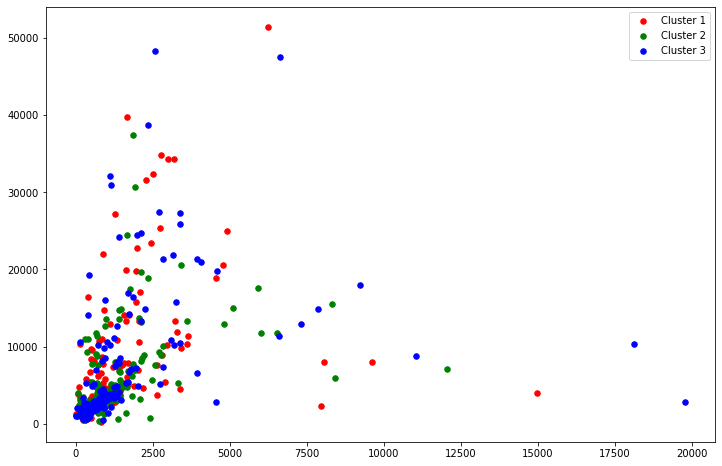

In [282]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1.values[:,9], cluster1.values[:,11], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2.values[:,9], cluster2.values[:,11], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3.values[:,9], cluster3.values[:,11], s=30, color='b', label='Cluster 3')
ax.legend()


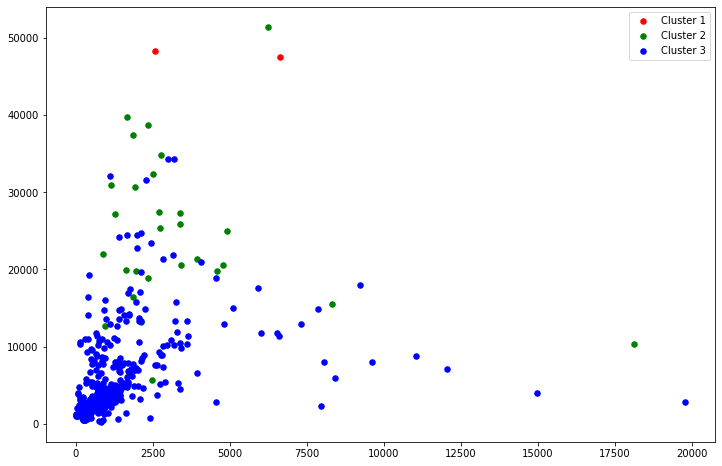

In [283]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(k_Meancluster1[:,9], k_Meancluster1[:,11], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2[:,9], k_Meancluster2[:,11], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3[:,9], k_Meancluster3[:,11], s=30, color='b', label='Cluster 3')
ax.legend()